In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Ruta del archivo cargado
file_path = "car_price_dataset.csv"

# Creo el DataFrame
df = pd.read_csv(file_path)

# Muestro la información general en busca de campos que puedan tener nulos
df_info = df.info()

# Mostrar las primeras filas para revisar la estructura de los datos
df_head = df.head()

# Mostrar la cantidad de valores nulos en cada columna
missing_values = df.isnull().sum()

# Mostrar resultados
df_info, df_head, missing_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


(None,
         Brand   Model  Year  Engine_Size Fuel_Type    Transmission  Mileage  \
 0         Kia     Rio  2020          4.2    Diesel          Manual   289944   
 1   Chevrolet  Malibu  2012          2.0    Hybrid       Automatic     5356   
 2    Mercedes     GLA  2020          4.2    Diesel       Automatic   231440   
 3        Audi      Q5  2023          2.0  Electric          Manual   160971   
 4  Volkswagen    Golf  2003          2.6    Hybrid  Semi-Automatic   286618   
 
    Doors  Owner_Count  Price  
 0      3            5   8501  
 1      2            3  12092  
 2      4            2  11171  
 3      2            1  11780  
 4      3            3   2867  ,
 Brand           0
 Model           0
 Year            0
 Engine_Size     0
 Fuel_Type       0
 Transmission    0
 Mileage         0
 Doors           0
 Owner_Count     0
 Price           0
 dtype: int64)

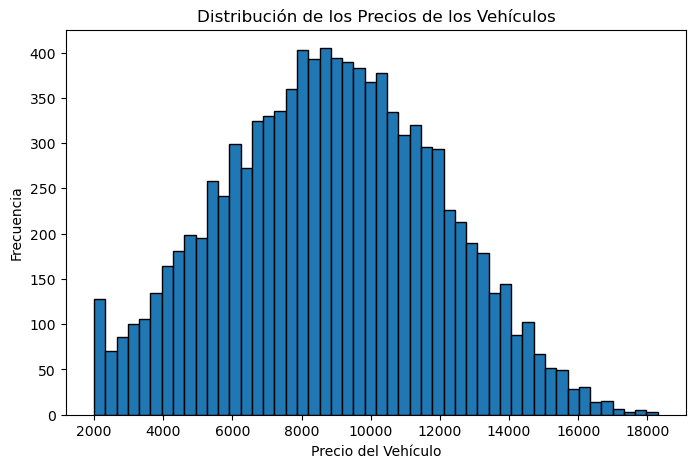

In [123]:
import matplotlib.pyplot as plt

# Histograma de precios
plt.figure(figsize=(8, 5))
plt.hist(df["Price"], bins=50, edgecolor="black")
plt.xlabel("Precio del Vehículo")
plt.ylabel("Frecuencia")
plt.title("Distribución de los Precios de los Vehículos")
plt.show()


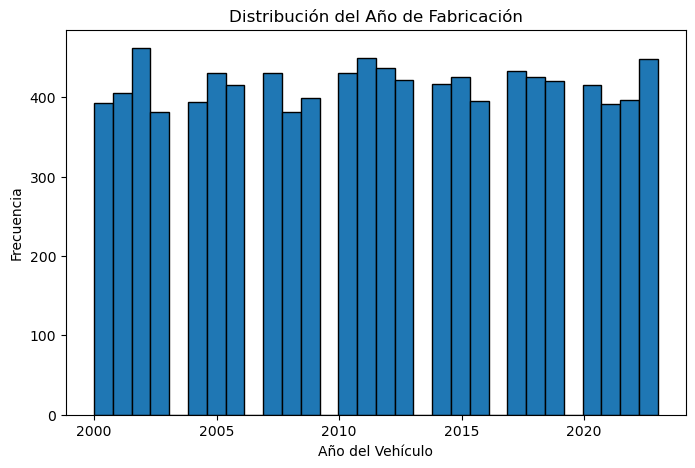

In [125]:
# Histograma del año del vehículo
plt.figure(figsize=(8, 5))
plt.hist(df["Year"], bins=30, edgecolor="black")
plt.xlabel("Año del Vehículo")
plt.ylabel("Frecuencia")
plt.title("Distribución del Año de Fabricación")
plt.show()

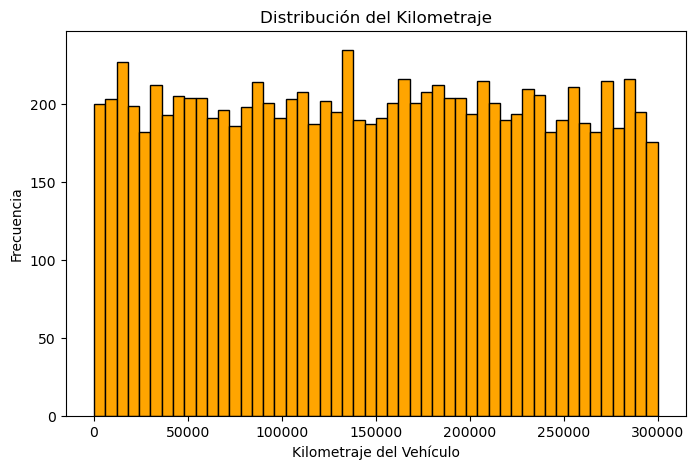

In [127]:
# Histograma del kilometraje
plt.figure(figsize=(8, 5))
plt.hist(df["Mileage"], bins=50, edgecolor="black", color="orange")
plt.xlabel("Kilometraje del Vehículo")
plt.ylabel("Frecuencia")
plt.title("Distribución del Kilometraje")
plt.show()


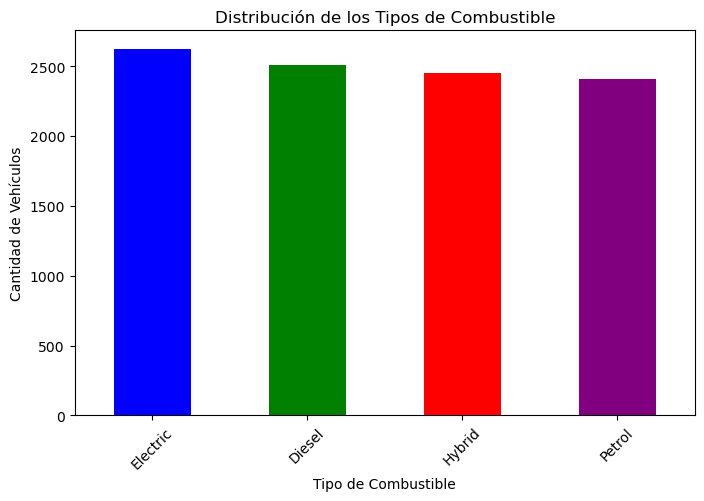

In [129]:
# Conteo de tipos de combustible
fuel_counts = df["Fuel_Type"].value_counts()

# Gráfico de barras para tipos de combustible
plt.figure(figsize=(8, 5))
fuel_counts.plot(kind="bar", color=["blue", "green", "red", "purple"])
plt.xlabel("Tipo de Combustible")
plt.ylabel("Cantidad de Vehículos")
plt.title("Distribución de los Tipos de Combustible")
plt.xticks(rotation=45)
plt.show()


In [131]:
# Mostrar estadísticas generales del dataset
df.describe()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


In [133]:
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


# Análisis de los datos
### - Distribución de precios:

Los precios varían entre 2,000 USD y 18,301 USD, con una media de 8,852 USD.
La distribución es relativamente normal, con más vehículos en el rango de (6,000 - 12,000)USD.
### - Año de los vehículos:

Hay modelos desde el año 2000 hasta 2023.
La distribución es uniforme, lo que indica que hay suficientes autos de diferentes edades.
### - Kilometraje:

Rango de 25 km a 299,947 km.
La media es de 149,239 km, lo cual es normal para autos usados.
### - Distribución de tipos de combustible:

Hay una distribución balanceada entre eléctricos, diésel, híbridos y gasolina.


# PASO 2: [Problem definition] Evaluar si el problema es de regresión o clasificación, clusterización, o predicción de series temporales.
#### Explicar cuales son las variables de entrada y salida:
Las variables de entrada (features) con las que intentaré encontrar patrones para predecir el precio serán:
* Numéricas: Year, Engine_Size, Mileage, Doors, Owner_Count.
* Categóricas: Brand, Model, Fuel_Type, Transmission (En este punto, aún debo convertirlas a formato numérico).

Variable de salida (objetivo): Price (el precio del vehículo, que queremos predecir).
#### ¿Es posible resolver dicho problema de forma eficiente sin recurrir a inteligencia artificial?
Si no hiciera uso de IA, se podría hacer tal vez un modelo de regresión lineal basado en Year, Mileage y Engine_Size, pero, habría muchas limitantes ya que no se podría adaptar a nuevos datos y tendría menos precisión para modelos de autos poco frecuentes.

Por lo tanto, no se podría resolver de forma eficiente el problema sin recurrir al uso de Machine Learning.

In [135]:
# Selecciono las variables de entrada y salida
X = df.drop(columns=["Price"])
y = df["Price"]

# Identificar variables categóricas y numéricas
categorical_features = ["Brand", "Model", "Fuel_Type", "Transmission"]
numerical_features = ["Year", "Engine_Size", "Mileage", "Doors", "Owner_Count"]

In [137]:
# PASO 3 [Data preparation]: Procedo a crear transformaciones y a normalizar los datos
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),  # Normalizar numéricas
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)  # Codificar categóricas
    ]
)

# Decido dividir el conjunto de entrenamiento y prueba (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplico las transformaciones al dataset
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [139]:
# Paso 4 [Modelados]: Entrenaré aplicando RandomFores y Gradient Boosting
# Defino hiperparámetros
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10]
}

param_grid_gbr = {
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1]
}

# Grid Search para Random Forest
rf_grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
rf_grid_search.fit(X_train_transformed, y_train)

# Grid Search para Gradient Boosting
gbr_grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid_gbr, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
gbr_grid_search.fit(X_train_transformed, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1],
                         'n_estimators': [50, 100]},
             scoring='neg_mean_absolute_error')

In [141]:
# Mejor modelo y evaluación
best_rf = rf_grid_search.best_estimator_
best_gbr = gbr_grid_search.best_estimator_

rf_predictions = best_rf.predict(X_test_transformed)
gbr_predictions = best_gbr.predict(X_test_transformed)

rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))

gbr_mae = mean_absolute_error(y_test, gbr_predictions)
gbr_rmse = np.sqrt(mean_squared_error(y_test, gbr_predictions))

In [143]:
# Mostrar mejores hiperparámetros y resultados
print("Mejores hiperparámetros Random Forest:", rf_grid_search.best_params_)
print("Mejores hiperparámetros Gradient Boosting:", gbr_grid_search.best_params_)

print("Random Forest Regressor después del tuning:")
print(f"MAE: {rf_mae:.2f}")
print(f"RMSE: {rf_rmse:.2f}\n")

print("Gradient Boosting Regressor después del tuning:")
print(f"MAE: {gbr_mae:.2f}")
print(f"RMSE: {gbr_rmse:.2f}")

Mejores hiperparámetros Random Forest: {'max_depth': None, 'n_estimators': 100}
Mejores hiperparámetros Gradient Boosting: {'learning_rate': 0.1, 'n_estimators': 100}
Random Forest Regressor después del tuning:
MAE: 260.84
RMSE: 334.92

Gradient Boosting Regressor después del tuning:
MAE: 169.55
RMSE: 216.66


# Paso 6 [Output]:
### Ya que mi problema es de regresión, aquí se encuentran los gráficos de salidas reales vs predicciones

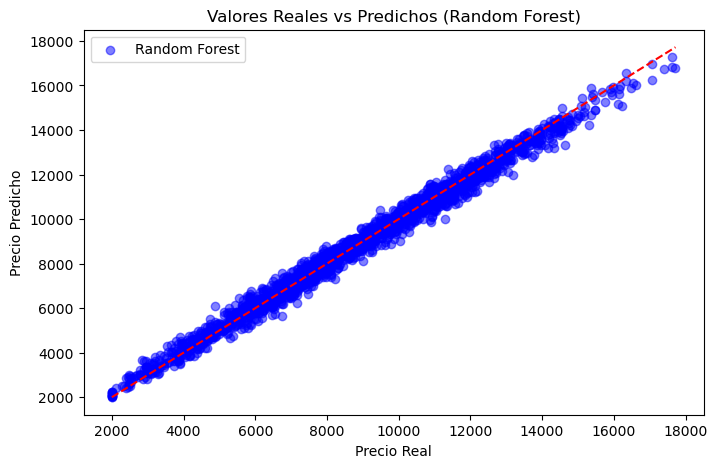

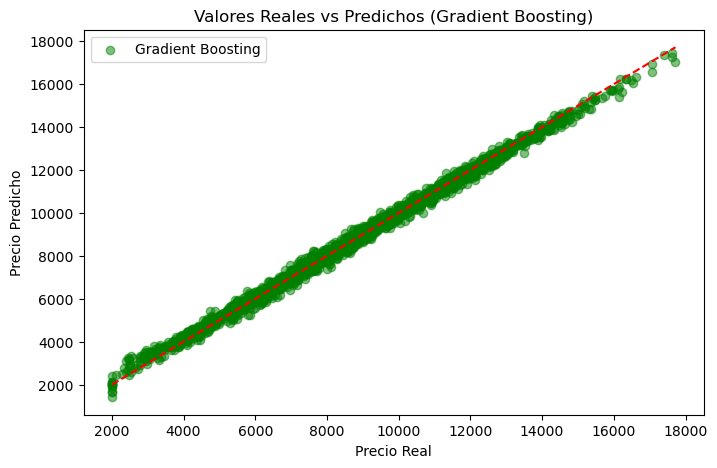

In [145]:
# Gráfico de valores reales vs predichos para Random Forest
plt.figure(figsize=(8, 5))
plt.scatter(y_test, rf_predictions, alpha=0.5, label="Random Forest", color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Línea ideal
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Valores Reales vs Predichos (Random Forest)")
plt.legend()
plt.show()

# Gráfico de valores reales vs predichos para Gradient Boosting
plt.figure(figsize=(8, 5))
plt.scatter(y_test, gbr_predictions, alpha=0.5, label="Gradient Boosting", color="green")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Línea ideal
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Valores Reales vs Predichos (Gradient Boosting)")
plt.legend()
plt.show()

# Respuesta final e interpretación de los gráficos:
Cada punto representa un automóvil con su precio real en el eje X y el precio predicho en el eje Y.
La línea roja punteada representa la predicción perfecta (cuando el precio real y el predicho coinciden exactamente).
Si los puntos están cerca de la línea roja, el modelo está haciendo buenas predicciones.
Si los puntos están muy dispersos, hay errores en las predicciones.

## Observaciones:
Ambos modelos siguen un patrón bastante alineado con la línea ideal, lo que indica que están haciendo predicciones razonablemente buenas.
Gradient Boosting parece más ajustado (menos dispersión en los puntos), lo que confirma que es el mejor modelo de los dos.